In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix,classification_report

import xgboost as xgb



In [2]:
df=pd.read_csv('Churn.csv')

In [3]:
#lets have a look at our data 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
#Total Charges has cells which are empty,lets fill those up with 0's and also change the data type so that further EDA becomes easier
df['TotalCharges'].fillna("0", inplace = True)
df['TotalCharges']=df['TotalCharges'].astype('float64')

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#shape of dataset
df.shape

(7043, 21)

In [8]:
#list all column names 
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
#Ready the Dataset for classification purpose 
df['Churn'].replace({"Yes":1, "No":0}, inplace = True)
dummy_df=pd.get_dummies(df)
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 7089 entries, SeniorCitizen to PaymentMethod_Mailed check
dtypes: float64(2), int64(3), uint8(7084)
memory usage: 47.9 MB


# EDA

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


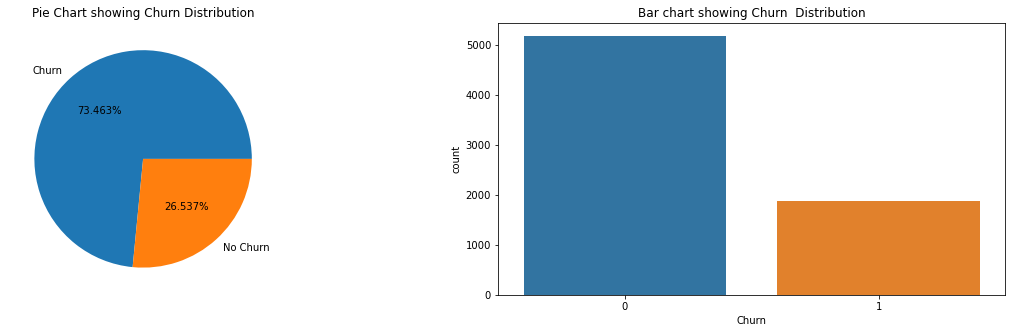

In [11]:
fig = plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.pie(df['Churn'].value_counts(),labels=['Churn','No Churn'],autopct = '%.3f%%')
plt.title('Pie Chart showing Churn Distribution')

plt.subplot(122)
sns.countplot(df['Churn'])
plt.title('Bar chart showing Churn  Distribution')
plt.show()

We divide the Tenure into monthly groups so as to determine if customers churn within a short period of time or a long period of time We divided our tenure in 1,2,3,4,5 and more than 5 months

In [12]:
def tenure_groups(df):
    if df['tenure'] <= 12:
        return "less_than_1"
    elif (df['tenure'] > 12) & (df['tenure'] <= 24):
        return "less_than_2"
    elif (df['tenure'] > 24) & (df['tenure'] <= 36):
        return "less_than_3"
    elif (df['tenure'] > 36) & (df['tenure'] <= 48):
        return "less_than_4"
    elif (df['tenure'] > 48) & (df['tenure'] <= 60):
        return "less_than_5"
    else:
        return "greater_than_5"

In [13]:
cpy_df=df.copy()

cpy_df['grouped_tenure'] = cpy_df.apply(lambda df: tenure_groups(df), axis = 1)

In [14]:
cpy_df['grouped_tenure'].head().unique()

array(['less_than_1', 'less_than_3', 'less_than_4'], dtype=object)

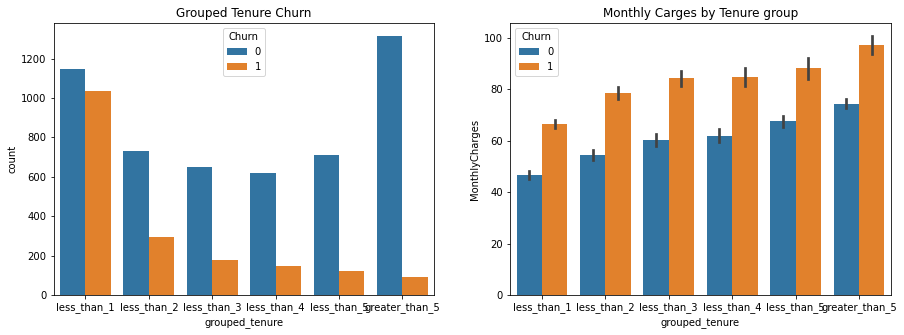

In [15]:
fig=plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = cpy_df, x = 'grouped_tenure', hue = 'Churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5']).set(title='Grouped Tenure Churn')
plt.subplot(1,2,2)
sns.barplot(data = cpy_df, x = 'grouped_tenure', y = 'MonthlyCharges', hue = 'Churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5']).set(title='Monthly Carges by Tenure group')
plt.show()

# EFFECT OF AGE AND GENDER ON THE CHURN OF CUSTOMER


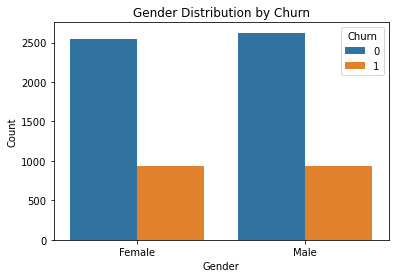

In [16]:
plt.subplot(111)
a = sns.countplot(data = df, x = 'gender', hue = 'Churn')
a.set_title('Gender Distribution by Churn')
a.set_xlabel('Gender')
a.set_ylabel('Count')
plt.show()

There seems to be not much of an effect of Gender on The Churn as both male and female bar graphs are very similar

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


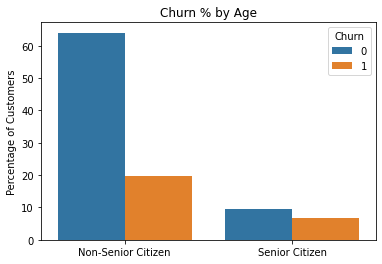

In [17]:
df_cpy=df.copy()
df_cpy = df_cpy.groupby('SeniorCitizen')['Churn'].value_counts().to_frame()
df_cpy = df_cpy.rename({'Churn':'pct_total'}, axis = 1).reset_index()
df_cpy['pct_total'] = (df_cpy['pct_total']/len(df)) * 100
t = sns.barplot('SeniorCitizen', y = 'pct_total', hue = 'Churn', data = df_cpy)
t.set_title('Churn % by Age')
t.set_xlabel('')
t.set_ylabel('Percentage of Customers')
t.set_xticklabels(labels = ['Non-Senior Citizen', 'Senior Citizen'])
plt.show()

A higher proportion of senior citizens churn than non-senior citizens

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


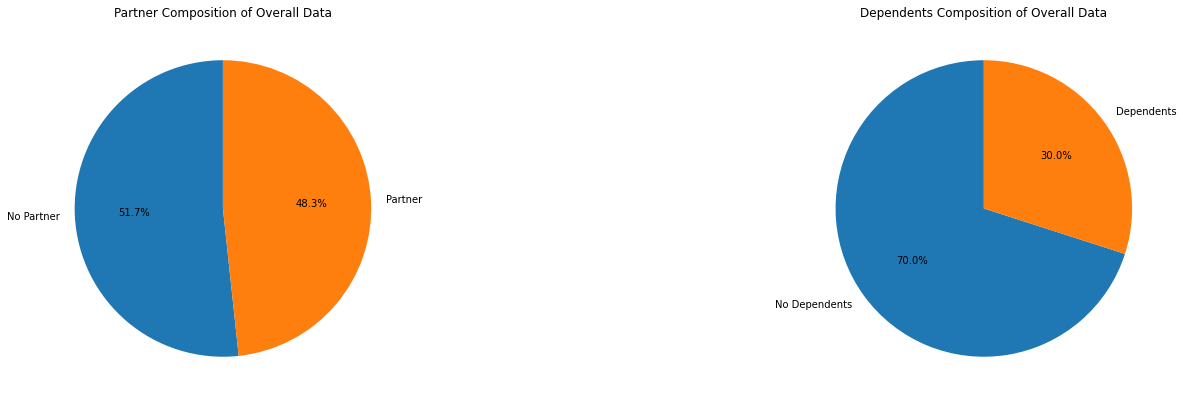

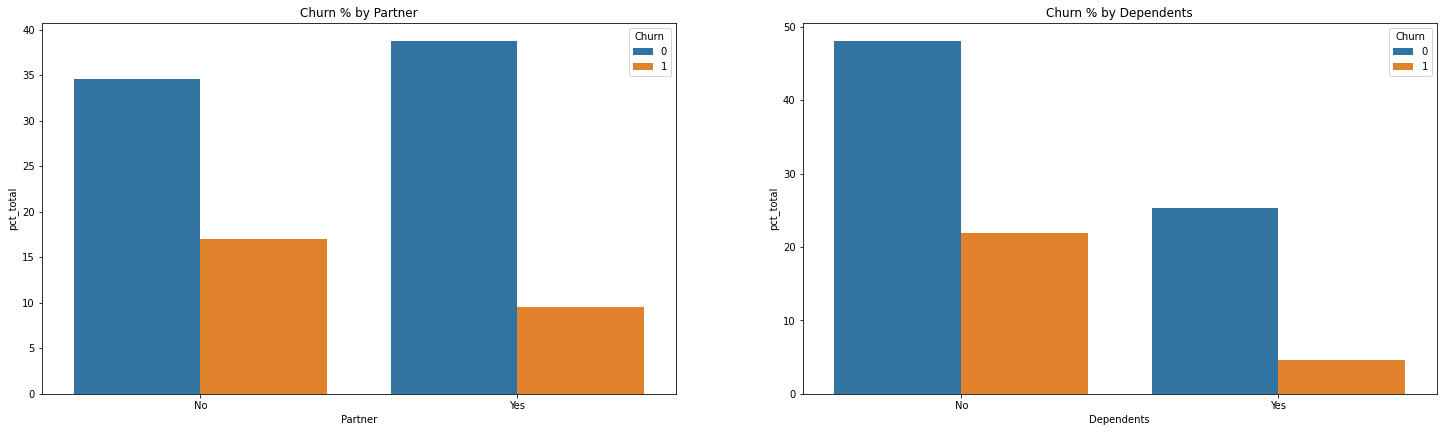

In [18]:
fig = plt.figure(figsize = (25,15))
i=221
for col in ['Partner','Dependents']:
  plt.subplot(i)
  plt.pie(df[col].value_counts(), labels = ['No '+col, col], autopct = '%.1f%%', radius = 1, startangle = 90)
  plt.title(col+' Composition of Overall Data')
  i+=1


fig = plt.figure(figsize = (25,15))

i=221
for col in ['Partner','Dependents']:
  plt.subplot(i)
  df_cpy=df.copy()
  df_cpy=df_cpy.groupby(col)['Churn'].value_counts().to_frame()
  df_cpy=df_cpy.rename({'Churn':'pct_total'},axis=1).reset_index()
  df_cpy['pct_total']=(df_cpy['pct_total']/len(df))*100
  sns.barplot(col,y='pct_total',hue = 'Churn', data = df_cpy).set(title='Churn % by '+col)
  
  i+=1
plt.show()

Customers with Partners tend to churn more as compared to those without a partner

Customers without dependents are more likely to churn than those with dependents

# EFFECT OF PHONE SERVICES


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


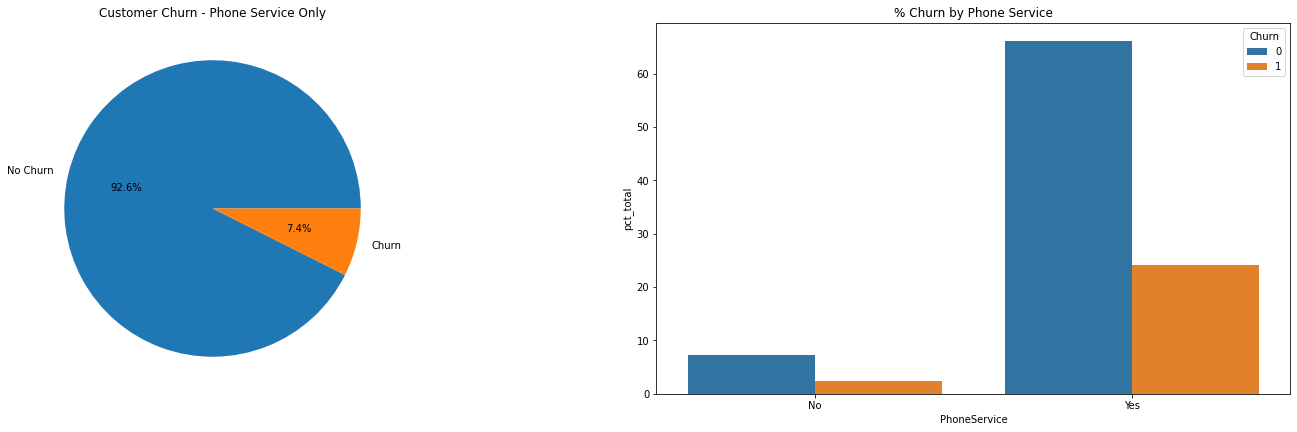

In [19]:
phone_only = df[(df['PhoneService'] == 'Yes') & (df['InternetService'] == 'No')]
fig = plt.figure(figsize = (25, 15))
plt.subplot(221)
plt.pie(phone_only['Churn'].value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1)
plt.title('Customer Churn - Phone Service Only')
plt.subplot(222)
z = df.copy()
z = z.groupby('PhoneService')['Churn'].value_counts().to_frame()
z = z.rename({'Churn':'pct_total'}, axis = 1).reset_index()
z['pct_total'] = (z['pct_total']/len(df)) * 100
sns.barplot('PhoneService', y = 'pct_total', hue = 'Churn', data = z).set(title='% Churn by Phone Service')
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


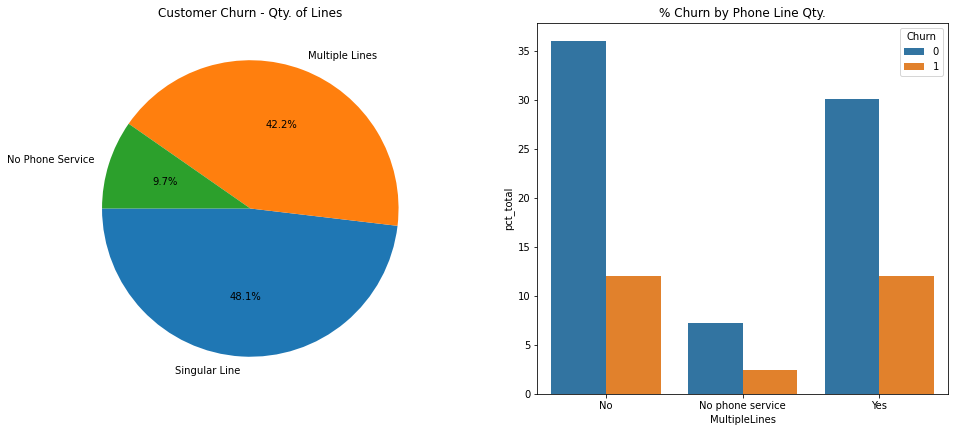

In [20]:
fig = plt.figure(figsize = (25, 15))
plt.subplot(234)
plt.pie(df.MultipleLines.value_counts(), labels = ['Singular Line', 'Multiple Lines', 'No Phone Service'], autopct = '%.1f%%', radius = 1, startangle = 180)
plt.title('Customer Churn - Qty. of Lines')
plt.subplot(235)
df_cpy = df.copy()
df_cpy = df_cpy.groupby('MultipleLines')['Churn'].value_counts().to_frame()
df_cpy = df_cpy.rename({'Churn':'pct_total'}, axis = 1).reset_index()
df_cpy['pct_total'] = (df_cpy['pct_total']/len(df)) * 100
sns.barplot('MultipleLines', y = 'pct_total', hue = 'Churn', data = df_cpy).set(title='% Churn by Phone Line Qty.')
plt.show()

Significantly more customers with only phone service will not churn than those other customers

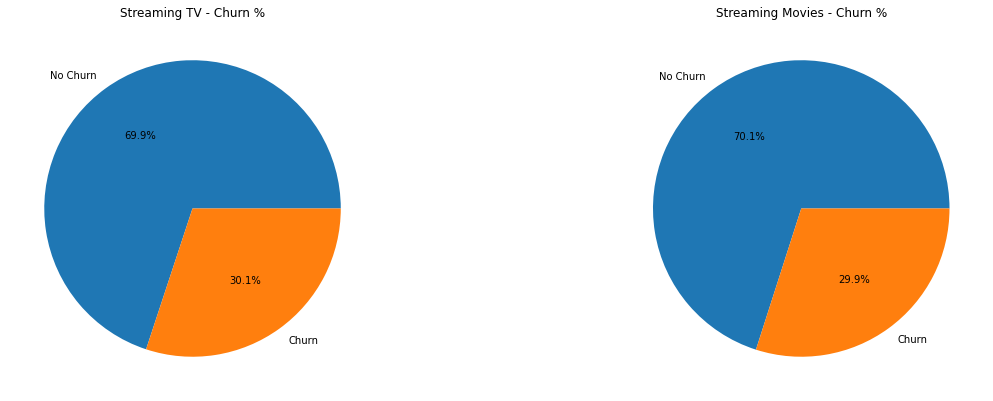

In [21]:
df_cpy=df[df['InternetService']!='No']
fig=plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
df_cpy5 = df_cpy[df_cpy.StreamingTV == 'Yes']
plt.pie(df_cpy5.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%')
plt.title('Streaming TV - Churn %') 
plt.subplot(2,2,2)
df_cpy6 = df_cpy[df_cpy.StreamingMovies == 'Yes']
plt.pie(df_cpy6.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%')
plt.title('Streaming Movies - Churn %')
plt.show()

Customers with TV Streaming and/or Movie streaming services churn more than all other services.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


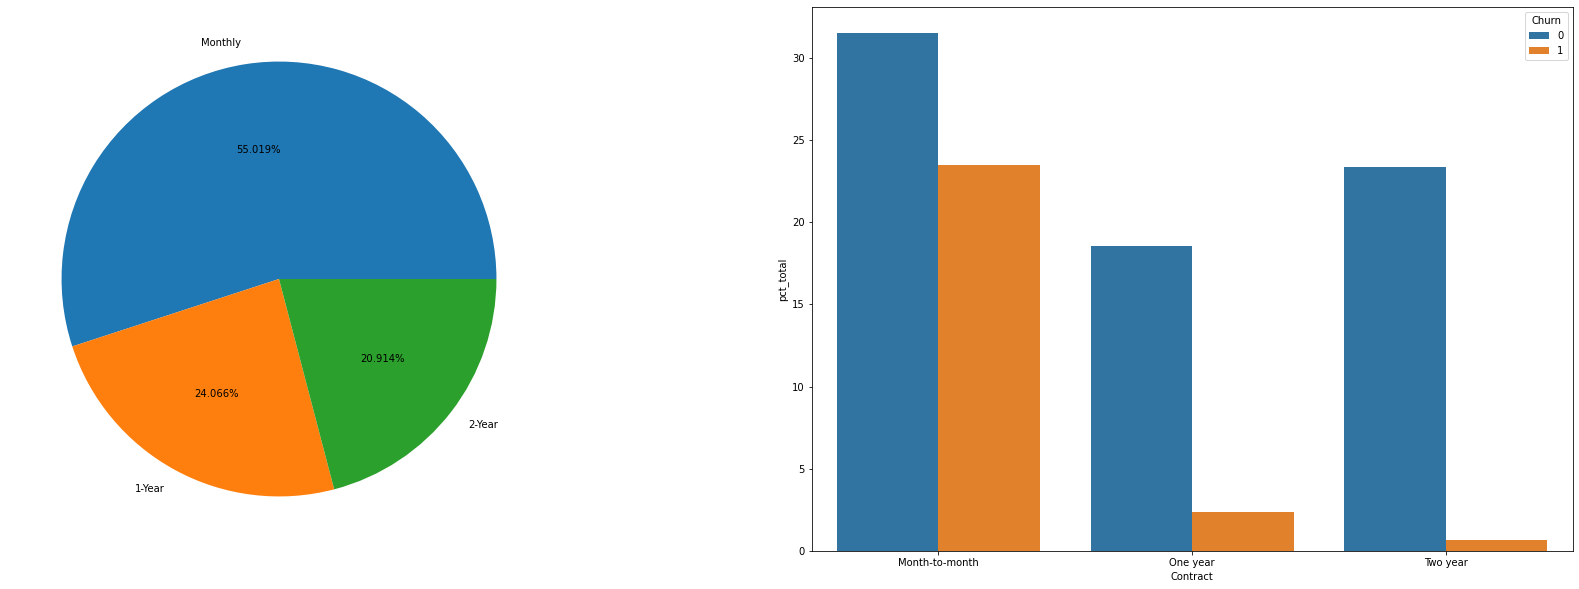

In [22]:
fig=plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.pie(df['Contract'].value_counts(),labels = ['Monthly', '1-Year', '2-Year'], autopct = '%.3f%%')

plt.subplot(1,2,2)
df_cpy=df.copy()
df_cpy = df_cpy.groupby('Contract')['Churn'].value_counts().to_frame()
df_cpy = df_cpy.rename({'Churn':'pct_total'}, axis = 1).reset_index()
df_cpy['pct_total'] = (df_cpy['pct_total']/len(df)) * 100
sns.barplot('Contract', y = 'pct_total', hue = 'Churn', data = df_cpy)
plt.show()

More than half of customers use a monthly payment option
Significantly more customers churn on monthly plans
The longer the plan, the lower the churn rate

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


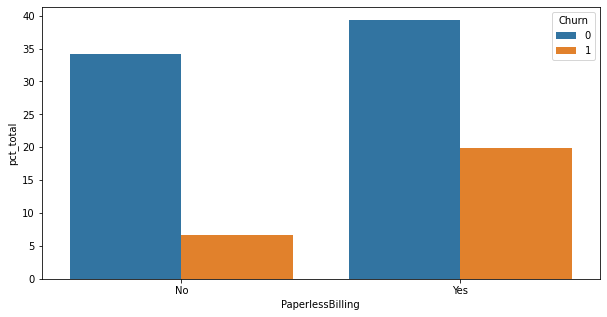

In [23]:
fig=plt.figure(figsize=(10,5))
df_cpy=df.copy()
plt.subplot(111)
df_cpy = df_cpy.groupby('PaperlessBilling')['Churn'].value_counts().to_frame()
df_cpy = df_cpy.rename({'Churn':'pct_total'}, axis = 1).reset_index()
df_cpy['pct_total'] = (df_cpy['pct_total']/len(df)) * 100
sns.barplot('PaperlessBilling', y = 'pct_total', hue = 'Churn', data = df_cpy)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


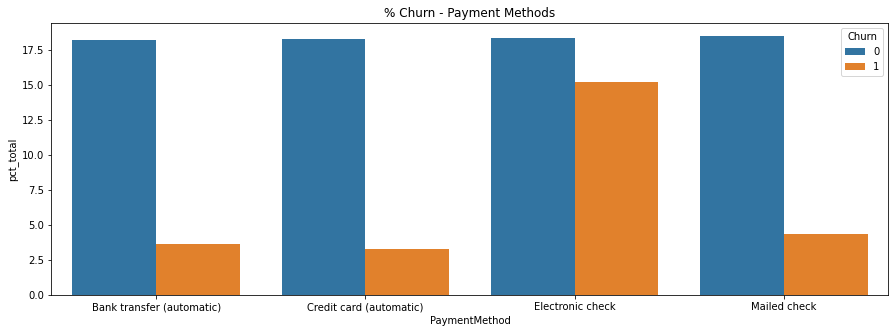

In [24]:
df_cpy=df.copy()
fig=plt.figure(figsize=(15,5))
plt.subplot(111)
df_cpy=df_cpy.groupby('PaymentMethod')['Churn'].value_counts().to_frame()
df_cpy=df_cpy.rename({'Churn':'pct_total'},axis=1).reset_index()
df_cpy['pct_total']=(df_cpy['pct_total']/len(df))*100
sns.barplot('PaymentMethod', 'pct_total', 'Churn', data = df_cpy).set(title='% Churn - Payment Methods')
plt.show()

Customers with non-paperless billing churn almost 15% more than paperless customers

# MODEL BUILDING

In [25]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
dummy_df.corr()['Churn'].sort_values(ascending = False)

In [ ]:
plt.figure(figsize = (30, 15))
sns.heatmap(df.corr())
plt.show()

##From our heatmap and correlation values, we see that monthly contract, and a lack of online security or techsupport have the strongest positive correlation with churn. 2-Year Contracts and not having internet service are the most negatively correlated with churn.

In [ ]:
y = dummy_df.Churn.values
X = dummy_df.drop('Churn', axis = 1)
cols = X.columns

In [ ]:
mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))
X.columns = cols

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .433, random_state = 33)

# Logistic Regression


In [ ]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')

logreg.fit(X_train, y_train)

In [ ]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [ ]:
print(f"Precision Score: {precision_score(y_test, y_hat_test)}")
print(f"Recall Score: {recall_score(y_test, y_hat_test)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_hat_test)}")
print(f"F1 Score: {f1_score(y_test, y_hat_test)}")
print()
print('Confusion matrix:\n ',confusion_matrix(y_test,y_hat_test))

# KNN Classifier


In [ ]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train, y_train)
test_preds1 = knn1.predict(X_test)
knn1.score(X_test, y_test)
print(f"Precision Score: {precision_score(y_test, test_preds1)}")
print(f"Recall Score: {recall_score(y_test, test_preds1)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds1)}")
print(f"F1 Score: {f1_score(y_test, test_preds1)}")
print()
print('Confusion matrix:\n ',confusion_matrix(y_test,test_preds1))

# Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(random_state = 33)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
print(f"Precision Score: {precision_score(y_test, dtree_pred)}")
print(f"Recall Score: {recall_score(y_test, dtree_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, dtree_pred)}")
print(f"F1 Score: {f1_score(y_test, dtree_pred)}")
print()
print('Confusion matrix:\n ',confusion_matrix(y_test,dtree_pred))

# GradientBoost

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

In [ ]:
xgb_pred = xgb_model.predict(X_test)
print(classification_report(y_test, xgb_pred))

In [ ]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

We can see that our model assigned more importance to TotalCharges and MonthlyCharges compared to others followed by the tenure


In order to Decrease the amount of Churn in Customers, the Company is advised to lower the Total and Monthly charges and introduce more plans with a long term of engagement